## Test LSTMs on Stock Market Prices.

The data set we use here are the GE stock prices of the last 50 years. [Source](https://www.kaggle.com/darkknight91/ge-stock/kernels)

In [10]:
import pandas as pd
data = pd.read_csv('ge.us.txt')

In [11]:
data.keys()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')

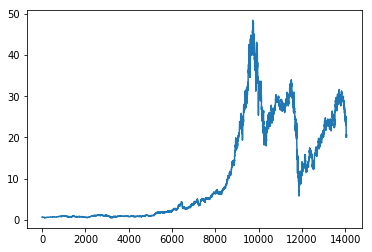

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(data['High'])
plt.show()

## Normalize Data
Because e.g. Volume are very large numbers that might affect the outcome.

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

train_cols = data.keys()
train_cols = train_cols.drop('Date')  # The dates are not relevant, only time series matters
df_train, df_test = train_test_split(data, train_size=0.8, test_size=0.2, shuffle=False)
print("Train and Test size", len(df_train), len(df_test))

# scale the feature MinMax, build array
x = df_train.loc[:,train_cols].values
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x)
x_test = min_max_scaler.transform(df_test.loc[:,train_cols])

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')
Train and Test size 11246 2812


## Input data
The input data is split into time steps for every day in the dataset. And at each time step we feed all the available information of that day. Which means we fee

In [26]:
x_test.shape

(2812, 6)